## Overview --

This is the second in a series of three notebooks for the project on predicting BQs at the 2013-17 Boston Marathon.

*Previous notebook -*

**BOS_1_import**: Imported data from 2013-17, calculated metrics, performed some exploratory data analysis (EDA), cleaned/wrangled data, outputted giant CSV file

*This notebook -*

**BOS_2_EDA**: Continue EDA, compile some tables and plots, establish a prediction baseline

## Introducing the Boston Marathon dataset (2013-17)

In recent years, the Boston Athletic Association (BAA), the non-profit that organizes the Boston Marathon, has set a field size of around 30,000 runners for the race. (About 20% of these are charity runners. The vast majority are time qualifiers.)

There were less than 18,000 finishers in 2013 due to the bombings.

There were over 32,000 starters in 2014 because the BAA chose to invite back 2013 non-finishers, along with accepting around 23,000 time qualifiers who weren't impeded by the bombings.

For our machine learning problem, we'll be using 2013-16 as training data to try and predict BQs/non-BQs in 2017.

We start by importing data that we organized earlier, in BOS_1_import.

In [1]:
# load modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from __future__ import print_function
#from helperFunctions import get_sec, raceFullStats_DF
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def get_sec(s):
# takes in text string 'HH:MM:SS.mss' and returns time in seconds
# can also be in MM:SS form
    import numpy as np

    try:
        if s == 'DNF':
            return np.NaN
        elif s == 'DSQ':
            return np.NaN
        elif s == 'DQ':
            return np.NaN
        elif s == 'N/A':
            return np.NaN
        elif s == 'nan':
            return np.NaN
        elif len(s) < 3: # deals with '' or ' ' cases (empty string or space)
            return np.NaN
        else:
            l = s.split(':')
            if len(l) == 3:
                if l[0][0] != '-':
                    return int(l[0]) * 3600 + int(l[1]) * 60 + int(float(l[2]))
                else: # negative!
                    return int(l[0]) * 3600 - int(l[1]) * 60 - int(float(l[2]))
        #needed to deal with the case of milliseconds in finish time: truncate to seconds
            elif len(l) == 2:
                if l[0][0] != '-':
                    return int(l[0]) * 60 + int(float(l[1]))
                else: # negative!
                    return int(l[0]) * 60 - int(float(l[1]))
            else:
                return "bad format!!"
    except TypeError: # AttributeError doesn't work!!
        # this catches NaN inputs when "len(s) < 3" is checked
        return np.NaN
    
def raceFullStats_DF(full_DF,gender_col,age_col):
# master function that displays a table with stats on all age groups:
# # of racers, min/median/mean/max times
# full_DF: DataFrame containing a race's results
# gender_col: name of the column in full_DF that contains gender/sex info: 'gender' or 'sex'
# example call: cimFULL = raceFullStats_DF(cim_table,'Gender')
    import pandas as pd

    F0_19 =  ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 0, 19)
    F20_24 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 20, 24)
    F25_29 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 25, 29)
    F30_34 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 30, 34)
    F35_39 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 35, 39)
    F40_44 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 40, 44)
    F45_49 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 45, 49)
    F50_54 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 50, 54)
    F55_59 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 55, 59)
    F60_64 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 60, 64)
    F65_69 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 65, 69)
    F70_74 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 70, 74)
    F75_79 = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 75, 79)
    F80_ = ageGroup_DF_parse(full_DF,age_col,gender_col,'F', 80, 199)
    M0_ =  ageGroup_DF_parse(full_DF,age_col,gender_col,'M',  0, 199)
    F0_ =  ageGroup_DF_parse(full_DF,age_col,gender_col,'F',  0, 199)
    M0_19 =  ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 0, 19)
    M20_24 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 20, 24)
    M25_29 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 25, 29)
    M30_34 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 30, 34)
    M35_39 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 35, 39)
    M40_44 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 40, 44)
    M45_49 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 45, 49)
    M50_54 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 50, 54)
    M55_59 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 55, 59)
    M60_64 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 60, 64)
    M65_69 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 65, 69)
    M70_74 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 70, 74)
    M75_79 = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 75, 79)
    M80_ = ageGroup_DF_parse(full_DF,age_col,gender_col,'M', 80, 199)
    ALL =  ageGroup_DF_parse(full_DF,age_col,gender_col,'ALL',  0, 1) #doesn't matter what ages are
    
    combine = [F0_19,F20_24,F25_29,F30_34,F35_39,F40_44,F45_49,F50_54,F55_59,F60_64,F65_69,F70_74,
               F75_79,F80_,
               M0_19,M20_24,M25_29,M30_34,M35_39,M40_44,M45_49,M50_54,M55_59,M60_64,M65_69,M70_74,
               M75_79,M80_,
               F0_,M0_,ALL]
    raceFullStats_table = pd.concat(combine) # DataFrame
    
    raceFullStats_table = raceFullStats_table.set_index('Age_Group')
    #index was useless (all 0s after "concat" command), so let's set index to 'Age_Group'
    
    return raceFullStats_table

def ageGroup_DF_parse(full_DF, age_col, gender_col, gender, lower_age, upper_age):
# this function takes in a full DataFrame containing a race's results (e.g., cim_table)
# age_col = string, containing the name of the column containing ages (e.g., 'Age')
# gender_col = string, containing the name of the column containing gender (e.g., 'Gender' or 'Sex')
# gender = string, containing either 'F' or 'M' or 'ALL'
# lower_age = int
# upper_age = int
# example call: cimF50_54 = ageGroup_DF_parse(cim_table,'Age','Gender','F', 50, 54)
    import datetime as dt
    import pandas as pd

    if gender == 'ALL':
        ageGroup_DF = full_DF
        # don't need lower_age & upper_age to reduce the DataFrame
    else:
        ageGroup_DF = full_DF[(full_DF[age_col] >= lower_age)
                         & (full_DF[age_col] < upper_age +0.9 )
                         & (full_DF[gender_col] == gender)]
    
    if ageGroup_DF.empty: # this section needed, for races that don't have, say, F75-79 racers
# "data" is a "dictionary"
        data = {'Age_Group': [str(gender + str(lower_age) + '-' + str(upper_age))],
                '#_run': [len(ageGroup_DF[age_col])],
                '#_BQs': [0],
                'BQ%': ['N/A'],
                'BQ_time': ['Varies' if ((gender == 'ALL') or (BQlookup2(gender,lower_age) != BQlookup2(gender,upper_age)))
                           else BQlookup2(gender,lower_age)[0:4]],
                'Min_time': ['N/A'],
                'Med_time': ['N/A'],
                'Mean_time': ['N/A'],
                'Max_time': ['N/A']}
    else:
        data = {'Age_Group': [str(gender + str(lower_age) + '-' + str(upper_age))],
                '#_run': [len(ageGroup_DF[age_col])],
                '#_BQs': [ageGroup_DF['BQ'].sum()],
                'BQ%': ['{:.1%}'.format(float(ageGroup_DF['BQ'].sum()) / float(len(ageGroup_DF[age_col])))],
                'BQ_time': ['Varies' if ((gender == 'ALL') or (BQlookup2(gender,lower_age) != BQlookup2(gender,upper_age)))
                           else BQlookup2(gender,lower_age)[0:4]],
            #'Varies' if ages are in different age groups (e.g., 50 & 73)
                'Min_time': [str(dt.timedelta(seconds=ageGroup_DF['seconds'].min()))],
                'Med_time': [str(dt.timedelta(seconds=ageGroup_DF['seconds'].median()))[0:7]],
                'Mean_time': [str(dt.timedelta(seconds=ageGroup_DF['seconds'].mean()))[0:7]],
                'Max_time': [str(dt.timedelta(seconds=ageGroup_DF['seconds'].max()))]}
    if gender == 'ALL':
        # change the dictionary key when reporting race summary, otherwise it's "ALLX-Y"
        data['Age_Group'] = 'ALL'
    
    ageGroup_DF_stats = pd.DataFrame(data, columns=['Age_Group', 
                                                    '#_run',
                                                    '#_BQs',
                                                    'BQ%',
                                                    'BQ_time',
                                                    'Min_time', 
                                                    'Med_time',
                                                    'Mean_time',
                                                    'Max_time'])
    #print ageGroup_DF_stats
    
    return ageGroup_DF_stats

def BQlookup2(gender, age):
    # gender & age are scalars
    if gender == "NA":
        BQreq = "?"
    elif age == "NA":
        BQreq = "?"
  
    if gender == 'M':
        if age < 35:
            BQreq = "3:05:00"
        elif age < 40:
            BQreq = "3:10:00"
        elif age < 45:
            BQreq = "3:15:00"
        elif age < 50:
            BQreq = "3:25:00"
        elif age < 55:
            BQreq = "3:30:00"
        elif age < 60:
            BQreq = "3:40:00"
        elif age < 65:
            BQreq = "3:55:00"
        elif age < 70:
            BQreq = "4:10:00"
        elif age < 75:
            BQreq = "4:25:00"
        elif age < 80:
            BQreq = "4:40:00"
        else:
            BQreq = "4:55:00"
    
    elif (gender == 'F'):
        if (age < 35):
            BQreq = "3:35:00"
        elif (age < 40):
            BQreq = "3:40:00"
        elif (age < 45):
            BQreq = "3:45:00"
        elif (age < 50):
            BQreq = "3:55:00"
        elif (age < 55):
            BQreq = "4:00:00"
        elif (age < 60):
            BQreq = "4:10:00"
        elif (age < 65):
            BQreq = "4:25:00"
        elif (age < 70):
            BQreq = "4:40:00"
        elif (age < 75):
            BQreq = "4:55:00"
        elif (age < 80):
            BQreq = "5:10:00"
        else:
            BQreq = "5:25:00"

    return(BQreq)

In [3]:
# timing mat information
halfway = 'split5_time'

marDist = 26.21875 # marathon distance in miles
fiveK = 3.106856 # 5K distance in miles
mats = [fiveK, fiveK*2, fiveK*3, fiveK*4, 0.5*marDist, fiveK*5, fiveK*6, fiveK*7, fiveK*8, marDist]
timingmats = {i+1:mats[i] for i in range(len(mats))}
# dictionary: timingmats[1] = 5K, timingmats[2] = 10K, etc

In [4]:
# load data
from datetime import datetime
print(datetime.now().strftime("%A, %d %B %Y %I:%M:%S%p"))

# file contains official results from 2013-17 Boston
boscomplete = pd.read_csv("BOSexample.csv",low_memory=False) # large file!!
print(len(boscomplete))

# some fields contain lists that are read in as strings
# use "eval" to convert them to lists
boscomplete['non_missing_splitpaces_time'] = boscomplete.non_missing_splitpaces_time.str.replace("'","")
for x in ['mm','non_missing_mats','non_missing_cumpaces','non_missing_splitpaces']:
    boscomplete[x] = boscomplete[x].apply(eval)

print(datetime.now().strftime("%A, %d %B %Y %I:%M:%S%p"))

Tuesday, 06 March 2018 08:18:06AM
129153
Tuesday, 06 March 2018 08:18:22AM


In [5]:
boscomplete.columns

Index([u'bib', u'name', u'age', u'sex', u'city', u'state', u'ctry', u'ctz',
       u'special', u'chip',
       ...
       u'split45', u'split35', u'split25', u'split56', u'split67', u'split78',
       u'split89', u'split910', u'pace_1sthalf', u'pace_2ndhalf'],
      dtype='object', length=117)

First, we'll plot the number of finishers from 2013-17.

These are the years that comprise our dataset for machine learning purposes later on: 2013-16 will be used as the training set, and 2017 serves as the test set.

Later in this notebook, we'll plot the number of finishers from 2001-17.

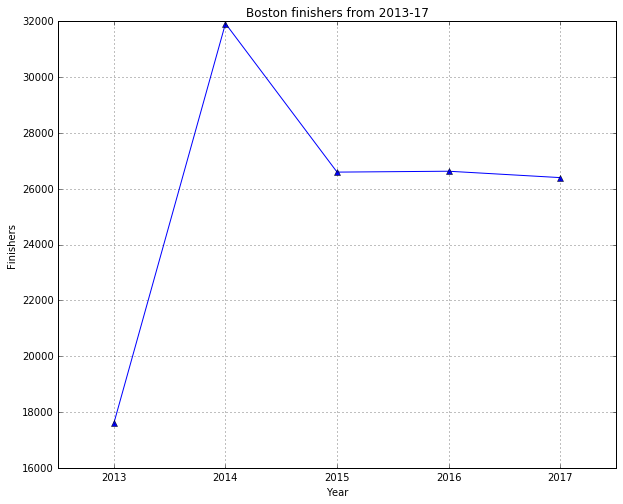

In [6]:
# plot finishers by year from 2013-7
boscomplete.year.value_counts().sort_index().plot.line(figsize=(10,8),style='^-',grid=True,xticks=None)

plt.xticks(boscomplete.year.value_counts().sort_index().index)
plt.ticklabel_format(useOffset=False) # gets rid of annoying scientific notation of x-axis
plt.xlim(boscomplete.year.min()-0.5, boscomplete.year.max()+0.5)
plt.xlabel("Year")
plt.ylabel("Finishers")
plt.title("Boston finishers from 2013-17")
plt.show()

Below, we'll plot the distribution of chip times, and show some statistics and plots for all the age groups. 

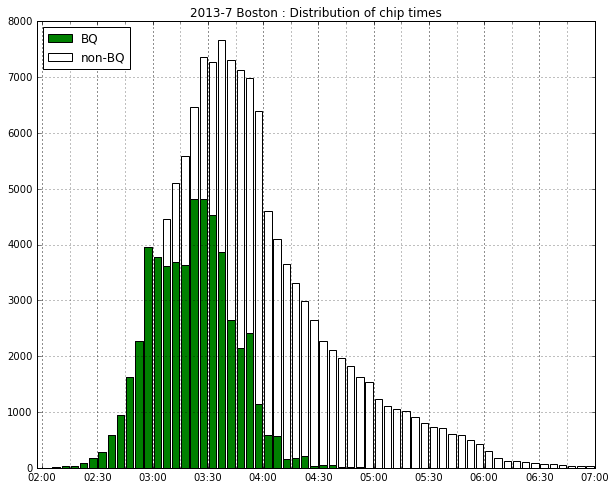

In [7]:
# plot histogram of finish times, with bin sizes of 5 minutes !!

dfr = boscomplete

fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.hist([dfr[(dfr.BQ==1)]['epoch'],dfr[(dfr.BQ==0)]['epoch']], 
    bins=mdates.epoch2num(np.arange(60*60*1.5,60*60*8,60*5)), 
    stacked=True, color = ['green','white'], histtype='bar',align='mid',label=['BQ','non-BQ'])
ymax = max(ax.get_ylim())
xmax = 60*60*7.0#dfr.seconds.max() + 60*10

ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
xlocator = mdates.MinuteLocator(byminute=[0,15,30,45], interval = 1)
ax.xaxis.set_minor_locator(xlocator)
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,30], interval = 1))
plt.xticks(rotation=0)
plt.grid(which='both',axis='both')
plt.legend(loc='upper left')
plt.title("2013-7 Boston : Distribution of chip times")
plt.xlim([mdates.epoch2num(60*60*1.95),mdates.epoch2num(xmax)])
plt.show()

We've excluded earlier years (for machine learning purposes) due to the following reasons --
- 2012 Boston had extraordinarily hot weather
- 2011 Boston had extraordinarily good weather (strong tailwind)
- the Boston Marathon qualifying standards changed after 2011 Boston (i.e., people trying to qualify for 2012 Boston at 2011 Boston had different standards than people trying to qualify for 2013 Boston at 2012 Boston)

In [8]:
# show race statistics from 2013-17, by age group
raceFullStats_DF(boscomplete, 'sex','age')

,#_run,#_BQs,BQ%,BQ_time,Min_time,Med_time,Mean_time,Max_time
Age_Group,,,,,,,,
F0-19,150,27,18.0%,3:35,2:27:14,4:11:55,4:17:02,6:03:14
F20-24,3509,1169,33.3%,3:35,2:20:35,3:50:13,4:03:42,7:16:50
F25-29,8408,3172,37.7%,3:35,2:19:59,3:43:46,3:58:09,7:18:22
F30-34,7531,2971,39.5%,3:35,2:22:02,3:43:13,3:57:12,7:11:57
F35-39,9008,3831,42.5%,3:40,2:21:52,3:45:31,3:56:16,10:30:23
F40-44,9332,3917,42.0%,3:45,2:36:28,3:51:26,4:01:36,7:40:17
F45-49,8954,4111,45.9%,3:55,2:46:44,3:58:04,4:06:36,8:45:17
F50-54,5720,2592,45.3%,4:00,2:52:51,4:04:20,4:12:42,7:31:38
F55-59,2939,1295,44.1%,4:10,2:50:29,4:15:18,4:23:12,7:24:24


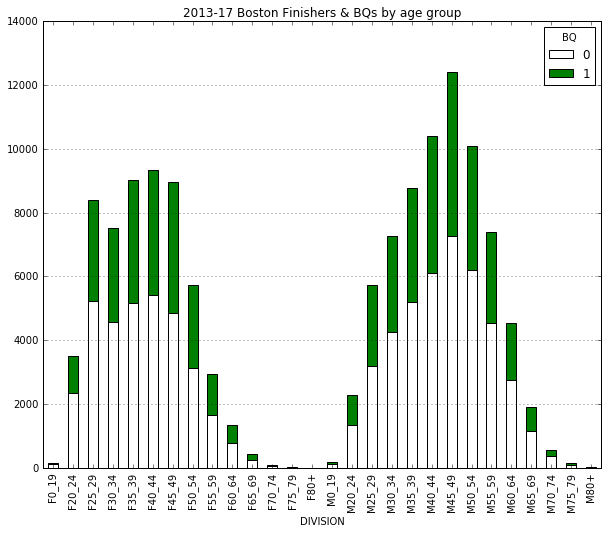

In [9]:
# plot histogram of AGs & BQs
AGbqs = pd.pivot_table(boscomplete, columns='BQ', values='bib', index ='DIVISION', aggfunc=len)
AGbqs.plot(kind='bar',stacked=True,color = ['white','green'], figsize=[10,8])
plt.grid(axis='y')
plt.title("2013-17 Boston Finishers & BQs by age group")
plt.show()

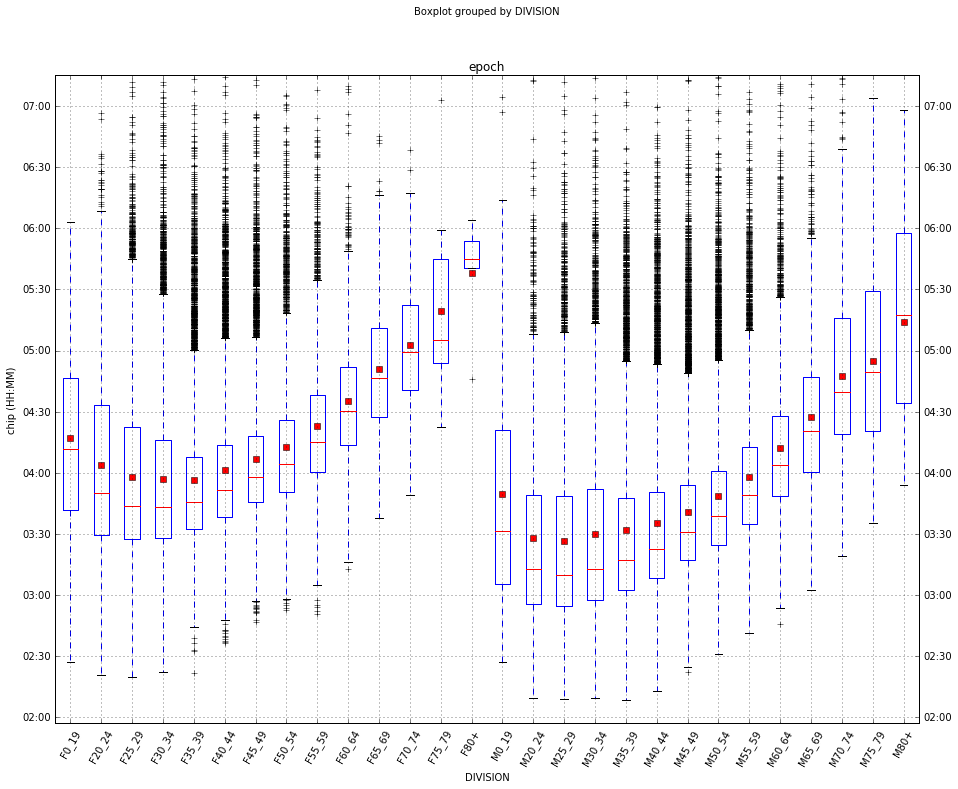

In [10]:
# plot boxplots of finish times by AG
dfr = boscomplete
ax = dfr.boxplot(column='epoch',by='DIVISION',figsize=[15,12],rot=60, showmeans=True)
yformatter = mdates.DateFormatter('%H:%M')
ylocator = mdates.MinuteLocator(byminute=[0,30], interval = 1)

## Set ytick labels to appear every 30 minutes
ax.yaxis.set_major_locator(ylocator)
ax.tick_params(labeltop=False, labelright=True)

## Format ytick labels as HH:MM
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
plt.ylabel('chip (HH:MM)')
plt.ylim([mdates.epoch2num(60*60*1.95),mdates.epoch2num(60*60*7.25)])
plt.show()

In the above plots, women are on the left and men are on the right. The red lines in the boxplot represent the median times, and the red squares represent the mean times.

There are lots of outliers that are represented by the + symbols. But we can see that men are generally faster than women, and that runners slow down as they age.

sex,F,M
year,,
2013,39.49%,60.51%
2014,44.93%,55.07%
2015,45.18%,54.82%
2016,45.69%,54.31%
2017,45.34%,54.66%


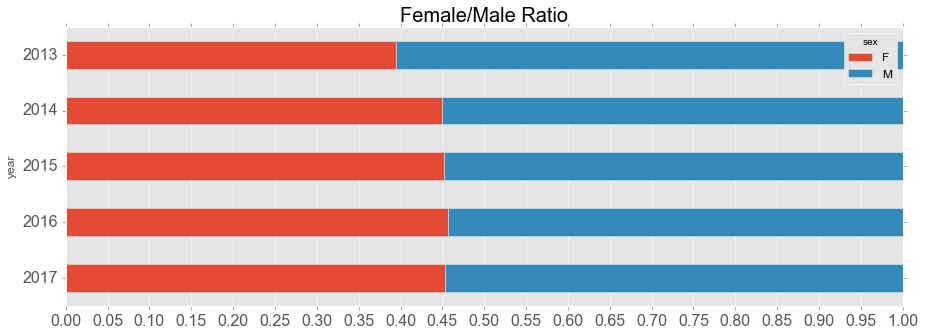

In [11]:
# Finishers: Female/Male ratios for 2013-17
from matplotlib.ticker import MultipleLocator
plt.style.use('ggplot')
matplotlib.rcParams.update({
    'font.family': 'Arial',
    'axes.titlesize': 20,
})
male_female = boscomplete.groupby(['year']).sex.value_counts().unstack()
male_female_normed = male_female.div(male_female.sum(1), axis=0)
ax = male_female_normed.plot(kind='barh', stacked=True, fontsize=16, title='Female/Male Ratio',figsize=(15,5))
ax.xaxis.set_major_locator(MultipleLocator(0.05))
ax.invert_yaxis()
# Show raw data
male_female_normed.applymap(lambda x: '{:.2%}'.format(x))

It looks like more men than women run the Boston Marathon. This is generally true for most marathon races.

In 2013, the race officials closed the finish line prematurely due to the bombings. Because women are generally slower than men, fewer women than expected had finished when the race was abruptly halted, and so a smaller percentage of women finished in 2013 compared to 2014-17.

Next, we'll plot the BQ ratios by age group. (We have already plotted the raw totals from each age group, above. Below, we'll show the raw totals in a table.)

BQ,0,1
DIVISION,,
F0_19,123,27
F20_24,2340,1169
F25_29,5236,3172
F30_34,4560,2971
F35_39,5177,3831
F40_44,5415,3917
F45_49,4843,4111
F50_54,3128,2592
F55_59,1644,1295


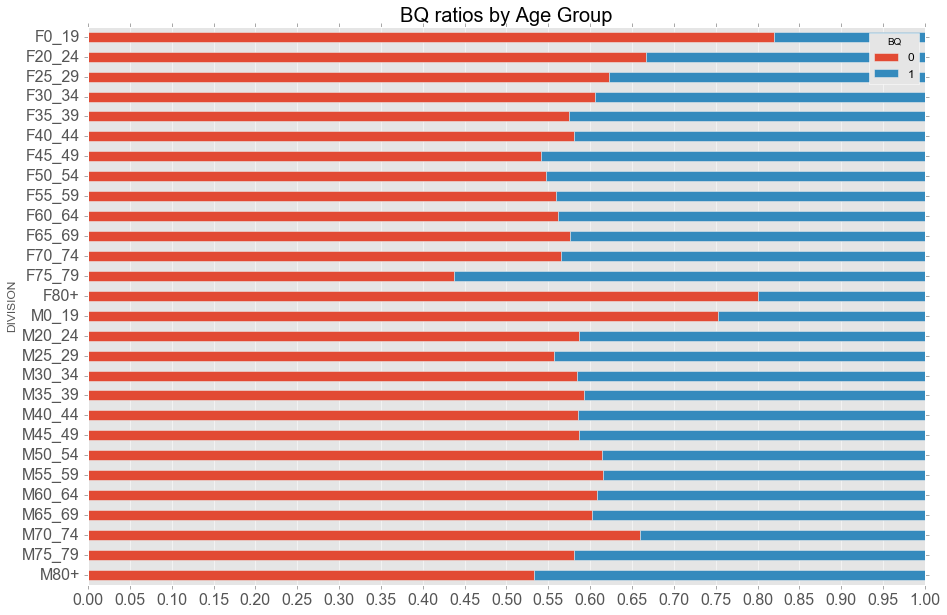

In [12]:
# BQ ratios by age group
AG = boscomplete.groupby(['DIVISION']).BQ.value_counts().unstack()
AG_normed = AG.div(AG.sum(1), axis=0)
ax = AG_normed.plot(kind='barh', stacked=True, fontsize=16, title='BQ ratios by Age Group',figsize=(15,10))
ax.xaxis.set_major_locator(MultipleLocator(0.05))
ax.invert_yaxis()
# Show raw data
AG_normed.applymap(lambda x: '{:.2%}'.format(x))
AG

Below, we'll compare the number of men & women, side by side, across the age groups.

We can see that women outnumber men up until age 40, with the largest discrepancy in the "roaring 20s". This is not uncommon at many marathons.

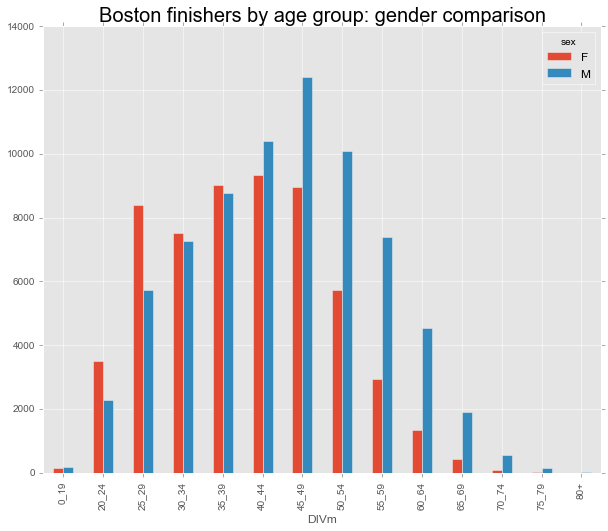

In [13]:
boscomplete['DIVm'] = boscomplete.DIVISION.str.replace("^[MF]","")
boscomplete.groupby(['DIVm']).sex.value_counts().unstack().plot.bar(figsize=(10,8))
plt.title("Boston finishers by age group: gender comparison")
plt.show()

### Timing mat locations

In terms of analyzing split paces, the Boston Marathon is a very good source of data because it has 9 timing mats between the start and finish (with the 10th and final mat at the finish line).

A common layout of timing mats at smaller marathons is the following: 10K, halfway (21.1K), Mile 20. The reason why marathons don't have more timing mats is due to economics: timing companies charge races for its services, and races often don't want to pay extra for more timing mats.

Large marathons, including Boston, have the following layout: 5K, 10K, 15K, 20K, halfway (21.1K), 25K, 30K, 35K, 40K, and the finish (42.2K). We've included these locations, in miles, in a dictionary called *timingmats* --

In [14]:
timingmats

{1: 3.106856,
 2: 6.213712,
 3: 9.320568,
 4: 12.427424,
 5: 13.109375,
 6: 15.53428,
 7: 18.641136,
 8: 21.747992,
 9: 24.854848,
 10: 26.21875}

###  Missing splits (timing mat anomalies)

Timing mats don't always detect runners' RFID tags as they go by.

Different races have varying degrees of timing mats not detecting runners. At Boston, this isn't a widespread issue.

Here, we take a look at the numbers of missing splits and where they occurred.

By now, you've probably figured out that "mm" stands for "missing mats", and "mm_len" represents len(mm). If a runner has mm = [1], that means that she has a missing first split.

In [15]:
# missing mats
dfr = boscomplete
print(dfr['mm_len'].value_counts().sort_index())
print(len(dfr[dfr.mm_len>0]))
print("{:.2%} of {} finishers had at least 1 missing split".format(len(dfr[dfr.mm_len>0])*1.0/len(dfr), len(dfr)))

0    128106
1       871
2        83
3        28
4        18
5        15
6         8
7         3
8         7
9        14
Name: mm_len, dtype: int64
1047
0.81% of 129153 finishers had at least 1 missing split


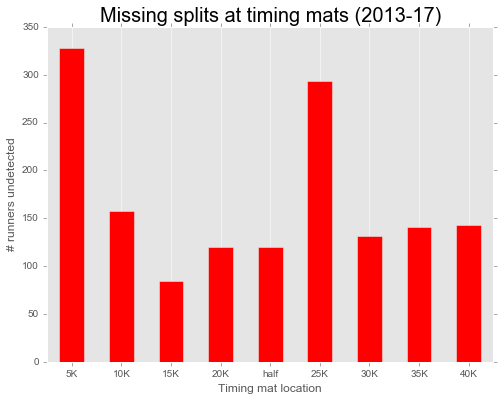

In [16]:
# show number of missing splits by location
#plt.style.use("default") # default, classic, seaborn-white, ggplot, fivethirtyeight, ...
missingmats_dict = {}
for x in range(1,len(timingmats)):
    missingmats_dict[timingmats[x]] = boscomplete.apply(lambda row: 1 if x in row['mm'] else 0,axis=1).sum()
pd.Series(missingmats_dict).plot.bar(rot=0, figsize=(8,6),color='r')
plt.xlabel("Timing mat location")
plt.ylabel("# runners undetected")
plt.title("Missing splits at timing mats (2013-17)")
plt.xticks(range(9), ['5K','10K','15K','20K','half','25K','30K','35K','40K'])
plt.grid(which='both',axis='y')
plt.show()

Because we want to leverage the most amount of information about a runner's pacing, we will drop records from the dataset that have any missing splits from 5K to halfway.

This will shrink the dataset by less than 1%, which isn't substantial.

### Ahead/behind pace

The fact of the matter is that marathons are hard because they are long, and runners tend to slow down as the race progresses.

For BQ purposes, runners "fade" out of BQs much more often than they tend to "come back" from behind. Later in this notebook, we'll define the "score" metrics that indicate whether a runner is ahead or behind. For now, we'll use the score metrics to show how many people are ahead or behind at all the timing mats.

In [17]:
# breakdown of those ahead/behind pace at timing mats
df = boscomplete
location = []
ahead_pace = []; ahead_fade = []
behind_pace = []; behind_fade = []
unknown_pace = []; unknown_fade = []
for i in timingmats.keys()[0:-1]:
    text = 'split' + str(i) + '_score'
    location.append(timingmats[i])
    ahead_pace.append(df[df[text] <= 0]['BQ'].sum())
    behind_pace.append(df[df[text] > 0]['BQ'].sum())
    unknown_pace.append(df[df[text].isnull()]['BQ'].sum())
    ahead_fade.append(len(df[df[text] <= 0].query("BQ==0")))
    behind_fade.append(len(df[df[text] > 0].query("BQ==0")))
    unknown_fade.append(len(df[df[text].isnull()].query("BQ==0")))
d = {'location': location, 'ahead_BQ': ahead_pace, 'behind_BQ': behind_pace, 'unknown_BQ': unknown_pace,
    'a_fade': ahead_fade, 'b_fade': behind_fade, 'u_fade': unknown_fade}
cols = ['location','ahead_BQ','behind_BQ','unknown_BQ','a_fade','b_fade','u_fade']
BQbreakdown = pd.DataFrame(d, columns=cols, index=range(1,len(mats)))
BQbreakdown['behind_BQpct'] = BQbreakdown.apply(lambda row: "{:.3%}".format(row['behind_BQ']*1.0/dfr['BQ'].sum()),axis=1)
BQbreakdown['a_fadepct'] = BQbreakdown.apply(lambda row: "{:.3%}".format(row['a_fade']*1.0/(row['ahead_BQ']+row['a_fade'])),axis=1)
#BQbreakdown['BQoptimal'] = BQbreakdown.apply(lambda row: "{:.3%}".format((dfr.BQ.sum()+row['a_fade'])*1.0/len(dfr)),axis=1)
#BQbreakdown['movement'] = BQbreakdown.apply(lambda row: "{:.3%}".format((row['behind_BQ']+row['a_fade'])*1.0/(row['ahead_BQ']+row['behind_BQ']+row['a_fade']+row['b_fade'])),axis=1)
BQbreakdown

,location,ahead_BQ,behind_BQ,unknown_BQ,a_fade,b_fade,u_fade,behind_BQpct,a_fadepct
1,3.106856,52116,818,91,36230,39661,237,1.543%,41.009%
2,6.213712,52583,390,52,35420,40602,106,0.736%,40.249%
3,9.320568,52754,239,32,33194,42882,52,0.451%,38.621%
4,12.427424,52791,197,37,28973,47072,83,0.372%,35.435%
5,13.109375,52814,170,41,28690,47359,79,0.321%,35.201%
6,15.534280,52834,157,34,24396,51472,260,0.296%,31.589%
7,18.641136,52775,201,49,16673,59373,82,0.379%,24.008%
8,21.747992,52643,340,42,7766,68263,99,0.641%,12.856%
9,24.854848,52786,202,37,1906,74116,106,0.381%,3.485%


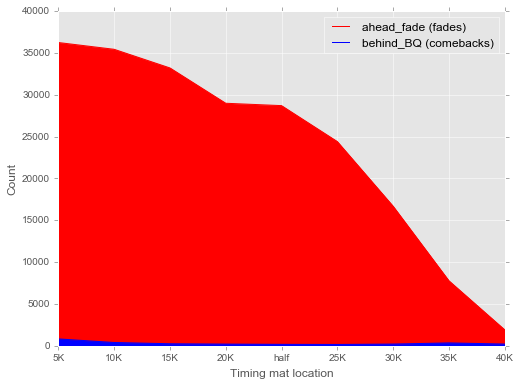

In [18]:
# plotting comebacks & fades
BQbreakdown.a_fade.plot(kind='area',label='ahead_fade (fades)',figsize=(8,6), color='r')
BQbreakdown.behind_BQ.plot(kind='area',label='behind_BQ (comebacks)',color='b',alpha=1)
plt.xticks(BQbreakdown.index,['5K','10K','15K','20K','half','25K','30K','35K','40K'])
plt.legend()
plt.xlabel("Timing mat location")
plt.ylabel('Count')
#plt.grid(which='both',axis='y')
plt.show()

To evaluate our machine learning prediction performance later on, we should have something to compare it with.

We'll define a baseline as follows -- predict that a runner will BQ if she's on or ahead of pace at halfway, and not BQ if she's behind pace at halfway.

In [19]:
# here's the accuracy of predicting BQs/non-BQs based on halfway score, for 2013-16
# (baseline: predict BQ if on or ahead of pace at halfway, non-BQ if behind pace at halfway)
df = boscomplete[~boscomplete.year.isin([2017]) & boscomplete.split5_score.notnull()]
print("2013-16 --")
print("{} data points".format(len(df)))
print("Baseline prediction accuracy: {:.2%}".format(((df['split5_score'] <= 0) == (df['BQ']==1)).sum() *1.0/len(df) ))
print("")

df = boscomplete[boscomplete.year.isin([2017]) & boscomplete.split5_score.notnull()]
print("2017 --")
print("{} data points".format(len(df)))
print("Baseline prediction accuracy: {:.2%}".format(((df['split5_score'] <= 0) == (df['BQ']==1)).sum() *1.0/len(df) ))

2013-16 --
102643 data points
Baseline prediction accuracy: 78.50%

2017 --
26390 data points
Baseline prediction accuracy: 74.27%


In [20]:
# print confusion matrix & classification report for 2013-16
df = boscomplete[~boscomplete.year.isin([2017]) & boscomplete.split5_score.notnull()]
y_true = (df['BQ']==1)
y_pred = (df['split5_score'] <= 0)
print(confusion_matrix(y_true, y_pred, labels = [False,True]))
print(classification_report(y_true, y_pred, digits=3, labels=[False,True], target_names=['non-BQ','BQ']))

[[36169 21922]
 [  147 44405]]
             precision    recall  f1-score   support

     non-BQ      0.996     0.623     0.766     58091
         BQ      0.669     0.997     0.801     44552

avg / total      0.854     0.785     0.781    102643



So, here's the question: can a machine learning algorithm do better than this in predicting BQs at Boston?

The goal is to use pacing information up to and including the halfway mark (and no further), along with other features such as age group, cumulative paces, and split paces.

### Examples of comebacks & fades

The table above shows that fades outnumber comebacks by a wide margin.

Below, we'll make some plots of average paces for examples of comebacks & fades -- this will help us get a sense of the magnitude of the slowdown when people fade toward the end of a race.

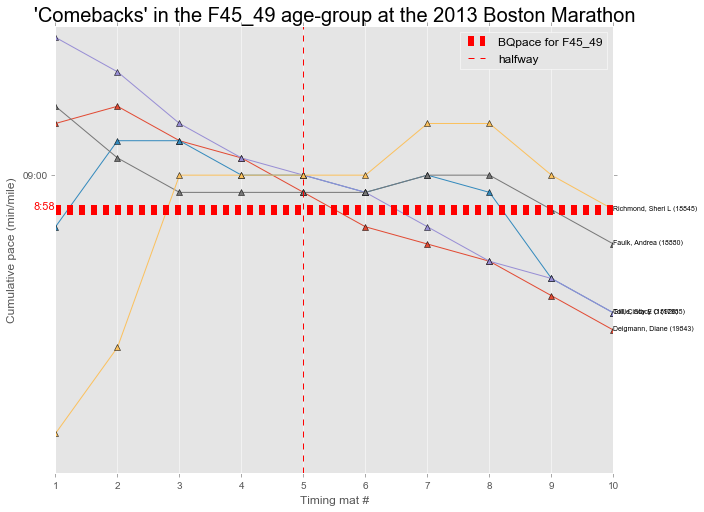

In [21]:
# plot average paces at timing mats (including finish line)
# for those in age group DIV who BQed but were behind BQpace at halfway (comebacks)

dfr = boscomplete
year = 2013
DIV = "F45_49"
age = int(DIV[-2:])-1

fig, ax = plt.subplots(1,1, figsize=(10,8))

for x in dfr.query("year=={}".format(year)).index:
    if (dfr.iloc[x]['DIVISION']==DIV) and (dfr.iloc[x]['age']<=age) and (dfr.iloc[x]['BQ'] == 1) and (dfr.iloc[x]['split5_score']>0) :
        #print dfr.iloc[x]['bib'], dfr.iloc[x]['chip'], dfr.iloc[x]['DIVISION'], dfr.iloc[x]['name'], dfr.iloc[x]['mm'], map(get_time,dfr.iloc[x]['non_missing_cumpaces'])
        ax.plot(dfr.iloc[x]['non_missing_mats'], mdates.epoch2num(dfr.iloc[x]['non_missing_cumpaces']), '^-' )
        ax.text(dfr.iloc[x]['non_missing_mats'][-1], mdates.epoch2num(dfr.iloc[x]['non_missing_cumpaces'])[-1], "{} ({})".format(dfr.iloc[x]['name'],dfr.iloc[x]['bib']), size = 7)
        BQpace = dfr.iloc[x]['BQpace']
ax.yaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.text(1, mdates.epoch2num(get_sec(BQpace)), "{}".format(BQpace), size = 11, horizontalalignment='right', color='red')
plt.grid(axis='y')
plt.axhline(mdates.epoch2num(get_sec(BQpace)),color='r',linestyle='--',linewidth=10,label="BQpace for {}".format(DIV))
plt.axvline(5,color='r',linestyle='--',label='halfway')
plt.ylabel("Cumulative pace (min/mile)")
plt.xlabel("Timing mat #")
plt.legend()
plt.title("'Comebacks' in the {} age-group at the {} Boston Marathon".format(DIV, year))
plt.show()

The above are a few examples of comebacks. We can clearly see that these runners were behind their BQ pace at halfway, where their cumulative pace is above the horizontal dotted line. But at the 10th and final timing mat (at the finish line), their cumulative pace is at or below their BQ pace.

The below shows the opposite. Runners are below their BQ pace at halfway, but at the finish line they came in above.

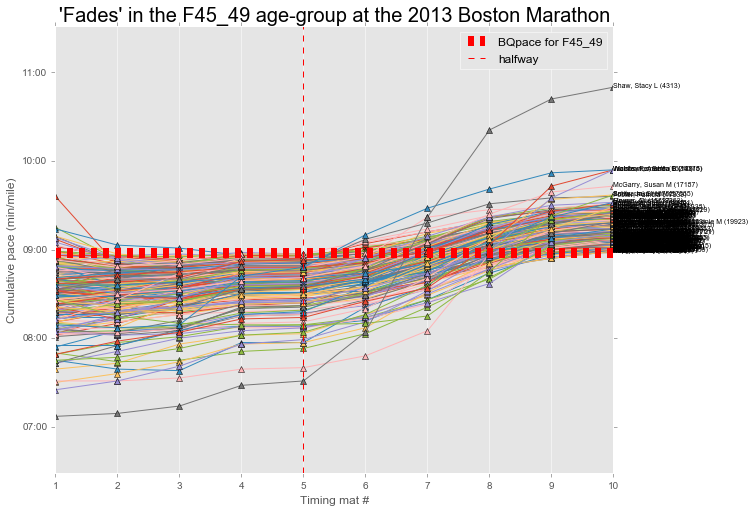

In [22]:
# plot average paces at timing mats (including finish line)
# for those in age group DIV who didn't BQ but were ahead of BQpace at halfway (fades)

dfr = boscomplete
year = 2013
DIV = "F45_49"
age = int(DIV[-2:])-1

fig, ax = plt.subplots(1,1, figsize=(10,8))

for x in dfr.query("year=={}".format(year)).index:
    if (dfr.iloc[x]['DIVISION']==DIV) and (dfr.iloc[x]['age']<=age) and (dfr.iloc[x]['BQ'] == 0) and (dfr.iloc[x]['split5_score']<=0) :
        ax.plot(dfr.iloc[x]['non_missing_mats'], mdates.epoch2num(dfr.iloc[x]['non_missing_cumpaces']), '^-' )
        ax.text(dfr.iloc[x]['non_missing_mats'][-1], mdates.epoch2num(dfr.iloc[x]['non_missing_cumpaces'])[-1], "{} ({})".format(dfr.iloc[x]['name'],dfr.iloc[x]['bib']), size = 7)
        BQpace = dfr.iloc[x]['BQpace']
ax.yaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.grid(axis='y')
plt.axhline(mdates.epoch2num(get_sec(BQpace)),color='r',linestyle='--',linewidth=10,label="BQpace for {}".format(DIV))
plt.axvline(5,color='r',linestyle='--',label='halfway')
plt.ylabel("Cumulative pace (min/mile)")
plt.xlabel("Timing mat #")
plt.legend()
plt.title("'Fades' in the {} age-group at the {} Boston Marathon".format(DIV, year))
plt.show()

There are so many fades that it's hard to plot them all for a single age group in a given year!

Below, we'll take a look at how many people "negative-split" from 2013-17. A "negative split" is an instance in which a person runs the second half of a race faster than the first half.

In [23]:
neg_split = boscomplete[boscomplete.splits<0]
print("{} negative-splits from 2013-17 Boston".format(len(neg_split)))
print("{:.3%} of Boston runners from 2013-17 ran negative splits".format(len(neg_split)*1.0/len(boscomplete[boscomplete.splits.notnull()])))

5424 negative-splits from 2013-17 Boston
4.204% of Boston runners from 2013-17 ran negative splits


### Primer on *splitX_time, splitX_pace, splitX_score*

Every runner has a BQ requirement, whether they're trying to BQ or not, based on his/her sex and age. (The BQ standards can be found __[here](http://www.baa.org/races/boston-marathon/participant-information/qualifying.aspx)__)

We've calculated everyone's __cumulative pace__ at the timing mats as __*splitX_pace*__, where *X* denotes the Xth timing mat. __*splitX_time*__ is the time taken by a runner to reach the Xth timing mat. At Boston, there are timing mats every 5K, plus one at the halfway mark and another at the finish line, for a total of 10 timing mats, where the 10th is at the finish.

*splitX_pace* is a string that takes the format of (M)M:SS, where the units are minutes per mile, and is calculated by the following formula: *splitX_time / timingmats[X]* . *splitX_pace* is rounded to the nearest second. Similarly, *BQpace* is calculated by *BQreq* / 26.21875.

__*splitX_score*__ is roughly calculated by *splitX_pace - BQpace*; roughly, because it's actually *splitX_pace (unrounded) - BQpace (unrounded)*. Think of *score* in terms of "golf score": the lower (and more negative), the better. Negative scores indicate that a runner is ahead of *BQpace*. For example, if a runner has, say a *split6_score* value of -1, we know that she's averaging 0:01/mi faster than her *BQpace* at the 6th timing mat (25K).

It's important to point out that two runners with the same exact *splitX_score* aren't necessarily running the same speed. *splitX_score* takes sex & age into account. For example, a 20-year-old male with a *split1_score* of 10 has averaged 7:13/mi for the first 5K, while a 70-year-old woman with the same *split1_score* has averaged 11:25/mi over the same distance. The main purpose of converting everyone's *splitX_paces* to *splitX_scores* is to quantify how fast a runner is going *relative to his BQpace*. A runner going 10:00/mi might seem slow, but compared to what? If that runner is a 70-year-old woman, then she's crushing her *BQpace*.

Below, the reader can find examples from the dataset and see that *split5_score* (rightmost column) is calculated correctly, by eyeballing *split5_pace* and *BQpace* in the nearby columns. (*split5* is the halfway mark, since the 5th timing mat is located at halfway.)

In [24]:
columns_i_want = ['year','BQ','bib','name','sex','age','chip','pace',halfway,'2ndhalf','BQreq','BQpace','split5_pace','split5_score']
boscomplete.sample(10)[columns_i_want]

,year,BQ,bib,name,sex,age,chip,pace,split5_time,2ndhalf,BQreq,BQpace,split5_pace,split5_score
103678,2017,1,1347,"Li, Yipeng",M,37,2:55:13,6:41,1:26:39,1:28:34,3:10:00,7:15,6:37,-38.216925
40463,2014,1,24926,"Daker, Jan",F,66,4:26:20,10:09,2:07:16,2:19:04,4:40:00,10:41,9:42,-58.278903
83836,2016,0,12587,"Tripp, Tony",M,46,3:29:55,8:00,1:38:37,1:51:18,3:25:00,7:49,7:31,-17.773540
113341,2017,0,16953,"Popik, Justine S",F,28,3:43:02,8:30,1:44:22,1:58:40,3:35:00,8:12,7:58,-14.340882
127288,2017,0,28448,"Walsh, James E",M,66,5:10:19,11:50,2:16:11,2:54:08,4:10:00,9:32,10:23,51.184744
86753,2016,1,24045,"Polanco, Claudia",F,47,3:39:26,8:22,1:45:43,1:53:43,3:55:00,8:58,8:04,-53.930870
43331,2014,0,33997,"Boyda, Robert M",M,57,4:46:59,10:57,2:17:47,2:29:12,3:40:00,8:23,10:31,127.160906
41034,2014,0,25811,"Evans, Audrey J",F,53,4:29:52,10:18,2:10:43,2:19:09,4:00:00,9:09,9:58,49.048868
108529,2017,1,12802,"England, Tiffany",F,33,3:25:12,7:50,1:43:40,1:41:32,3:35:00,8:12,7:54,-17.544696
94497,2016,0,21389,"Dean, Elizabeth",F,49,4:07:46,9:27,1:54:26,2:13:20,4:00:00,9:09,8:44,-25.477950


### Primer on *splitXY_pace/score*

*splitX_pace* is the *cumulative* pace up to timing mat X, whereas *splitXY_pace* is the *split* pace between timing mats X & Y.

We're concerned only with split paces between consecutive timing mats, meaning that X & Y are always consecutive integers.

Also, we're using information up to the halfway point and no further, so we'll be making use of the following split paces: *split12_pace, split23_pace, split34_pace, split45_pace*

Calculating *splitXY_pace* goes as follows: *(splitY_time - splitX_time) / (timingmats[Y] - timingmats[X])*

*splitXY_score* is related to *splitXY_pace* in the same way that *splitX_score* is related to *splitX_pace* as described above; that is, the more negative the score, the better, relative to *BQpace*.

For illustration purposes below, we'll show cumulative & split paces up to and including the third timing mat for a few runners.

In [25]:
columns_i_want = ['year','BQ','bib','name','sex','age','chip','BQreq','BQpace','split1_pace','split2_pace','split3_pace',
                 'split12_pace','split23_pace','split12_score','split23_score']
boscomplete.sample(10)[columns_i_want]

,year,BQ,bib,name,sex,age,chip,BQreq,BQpace,split1_pace,split2_pace,split3_pace,split12_pace,split23_pace,split12_score,split23_score
71524,2015,0,28683,"Denehy, Michael P",M,20,4:21:14,3:05:00,7:03,10:07,9:54,9:51,9:40,9:47,156.968295,163.405671
83588,2016,0,4924,"Bushman, Lou M Jr",M,37,3:29:10,3:10:00,7:15,7:10,7:15,7:18,7:21,7:23,5.835044,8.088126
52150,2015,1,3971,"Labat, Benoit",M,32,2:59:55,3:05:00,7:03,6:39,6:40,6:39,6:40,6:38,-22.956362,-25.209444
25162,2014,1,10130,"Bienkowski, Mark",M,45,3:24:12,3:25:00,7:49,7:47,7:45,7:45,7:43,7:43,-5.960719,-5.960719
125645,2017,0,18815,"Wright, Kimberley A",F,56,4:47:29,4:10:00,9:32,8:14,8:19,8:24,8:23,8:34,-69.028726,-58.085187
102152,2016,0,31981,"Goddard, Natasha J",F,44,5:39:48,3:55:00,8:58,10:44,11:05,11:23,11:25,11:59,147.153723,181.593684
7284,2013,1,8593,"Corbeil, Serge",M,49,3:25:42,3:30:00,8:01,7:44,7:33,7:29,7:21,7:21,-39.933728,-39.933728
109719,2017,1,15185,"Corbett, Taylor",F,27,3:29:39,3:35:00,8:12,7:34,7:33,7:34,7:32,7:37,-40.432382,-35.282481
29651,2014,1,19296,"Sterrett, Nicole F",F,39,3:38:49,3:45:00,8:35,8:24,8:18,8:17,8:13,8:13,-21.795693,-21.473825
96575,2016,0,29642,"Dent, John A",M,62,4:19:53,3:55:00,8:58,9:56,9:34,9:30,9:12,9:22,14.221910,23.877974


### More EDA: prior years, and those left out of 2013-17

For machine learning purposes, we're looking at official finishers from 2013-17, not those who (1) got into the race and didn't start, (2) started but didn't finish, or (3) finished but didn't get an official time.

Here, we'll show the number of qualified runners who were shut out of the registration process, and the amount by which entrants had to beat their BQ time in order to get into the race. (Due to field size limitations set by the Boston Athletic Association, not everyone can get in if there are more registrants than spots available, and the cutoffs were set for the purpose of keeping people out.)

In [26]:
# see table at bottom of URL --
# http://www.baa.org/races/boston-marathon/participant-information/qualifying/history-of-qualifying-standards.aspx

leftout = pd.DataFrame({'year': range(2012,2019),
                        'cutoff': ['1:14','0:00','1:38','1:02','2:28','2:09','3:23'],
                       'rejected': [3228, 0, 2976, 1947, 4562, 2957, 5062]})
leftout.set_index('year',inplace=True)
leftout['cutoff_p'] = leftout.cutoff.apply(get_sec).apply(mdates.epoch2num)

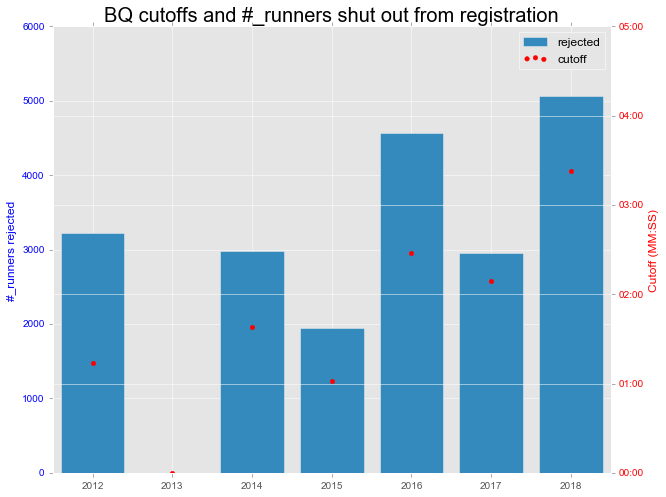

In [32]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(leftout.index,leftout.rejected, align='center', label='rejected')
ax.set_ylabel("#_runners rejected", color='b')
for tl in ax.get_yticklabels():
    tl.set_color('b')

ax2 = ax.twinx()
ax2.scatter(leftout.index,leftout.cutoff_p, color='r', label='cutoff')
ax2.set_ylabel("Cutoff (MM:SS)", color='r')
ax2.yaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
ax2.yaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.ylim([mdates.epoch2num(0), mdates.epoch2num(60*5)])
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# make sure that legend has entries from both ax & ax2
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax.ticklabel_format(useOffset=False) # gets rid of annoying scientific notation of x-axis
plt.xlim(leftout.index.min()-0.5, leftout.index.max()+0.5)
plt.title("BQ cutoffs and #_runners shut out from registration")
plt.show()

Next, we'll load the official results for 2001-12 for the purposes of plotting the number of finishers. We can see how the race has increased in size through the years, up through 2017.

In [28]:
print(datetime.now().strftime("%A, %d %B %Y %I:%M:%S%p"))

historical = pd.DataFrame()

for yr in range(2001,2013):
    df = pd.read_excel(str(yr) + "bostonofficial.xlsx")
    historical = pd.concat([historical,df])
    
# the "special" column contains "WHEELCHAIR" and "HANDCYCLE" for special athletes
# we want just the runners, so, we'll exclude all non-runners
historical_runners = historical[historical.special.isnull()]

print(datetime.now().strftime("%A, %d %B %Y %I:%M:%S%p"))

Tuesday, 06 March 2018 08:20:11AM
Tuesday, 06 March 2018 08:21:30AM


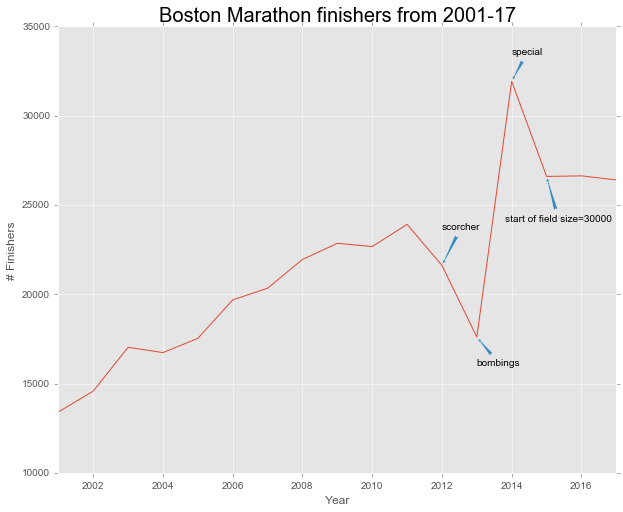

In [29]:
# plotting number of finishers from 2001-17
ax = pd.concat([historical_runners,boscomplete]).year.value_counts().sort_index().plot(figsize=(10,8))
ax.annotate("scorcher", xy=(2012, len(historical_runners.query("year==2012"))), xytext=(2012, len(historical_runners.query("year==2012"))+2000),
        arrowprops=dict(arrowstyle="fancy"))
ax.annotate("bombings", xy=(2013, len(boscomplete.query("year==2013"))), xytext=(2013, len(boscomplete.query("year==2013"))-1600),
        arrowprops=dict(arrowstyle="fancy"))
ax.annotate("special", xy=(2014, len(boscomplete.query("year==2014"))), xytext=(2014, len(boscomplete.query("year==2014"))+1500),
        arrowprops=dict(arrowstyle="fancy"))
ax.annotate("start of field size=30000", xy=(2015, len(boscomplete.query("year==2015"))), xytext=(2013.8, len(boscomplete.query("year==2015"))-2500),
        arrowprops=dict(arrowstyle="fancy"))
plt.xlabel("Year")
plt.ylabel("# Finishers")
plt.title("Boston Marathon finishers from 2001-17")
plt.show()

In [30]:
stop_here

NameError: name 'stop_here' is not defined